# CS146 Session 9.1 PCW 

## Task 1: Converting Directed Graphs to Factor Graphs 

<img src="Conversion_1.png">
<img src="Conversion_2.png">

## Task 2: Generating Samples from a Directed Graphical Model 

In [2]:
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt

# Field goal rate data. Each tuple contains (field goals made, field goals attempted).
player_field_goal_data = {
    # http://www.espn.com/nba/player/gamelog/_/id/2594922/year/2018/otto-porter-jr
    'Otto Porter Jr': [(0, 0), (4, 9), (4, 8), (3, 7), (5, 10), (4, 7), (0, 0), (5, 8), (4, 9)],
    # http://www.espn.com/nba/player/gamelog/_/id/3024/year/2018/jj-redick
    'JJ Redick': [(5, 13), (3, 11), (6, 15), (9, 17), (7, 13), (6, 13), (8, 18), (4, 9), (4, 13)],
    # http://www.espn.com/nba/player/gamelog/_/id/3213/year/2018/al-horford
    'Al Horford': [(7, 12), (2, 8), (4, 9), (5, 13), (2, 4), (5, 13), (8, 10), (7, 16), (4, 6)],
}

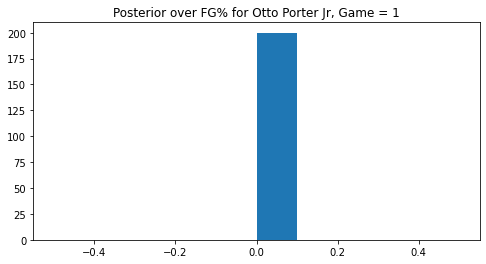

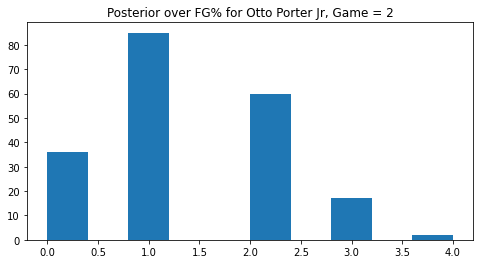

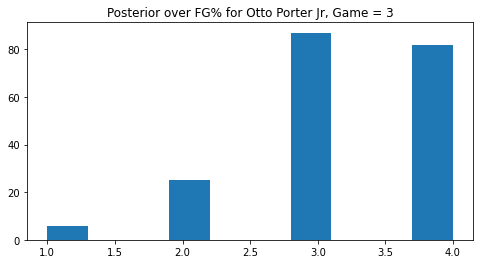

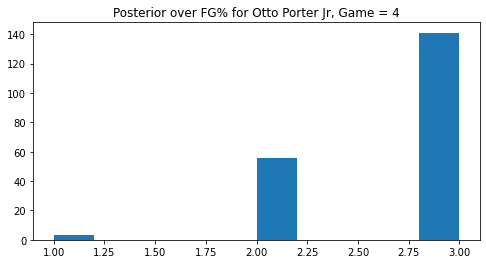

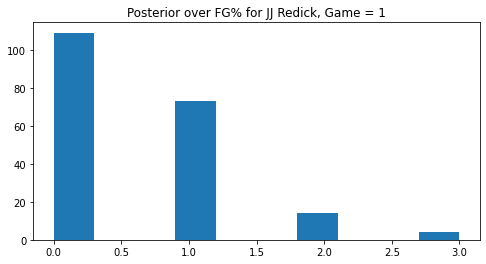

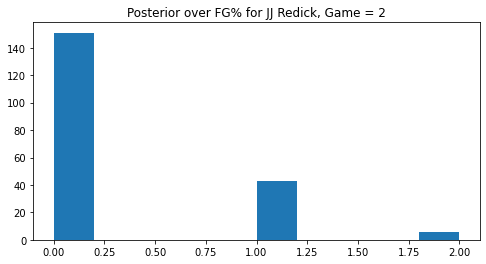

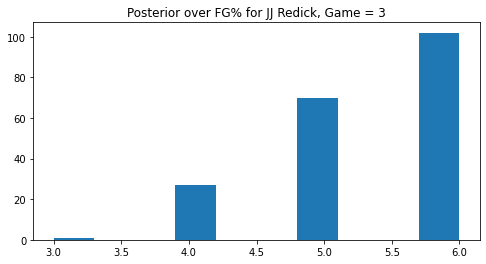

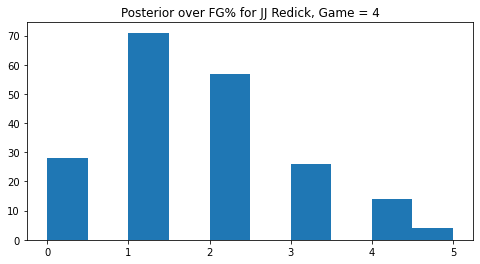

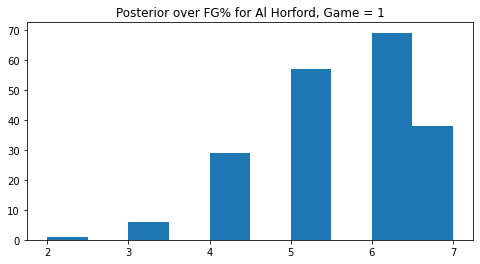

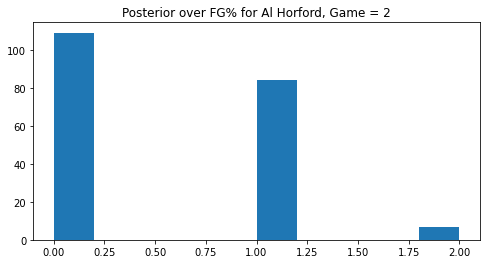

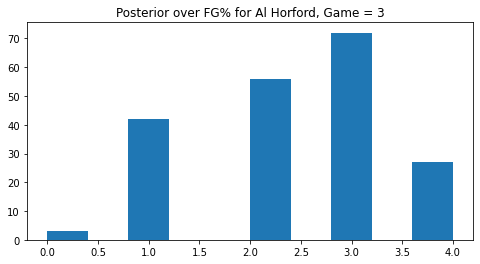

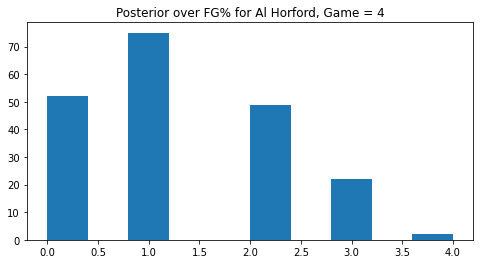

In [51]:
for player in player_field_goal_data.keys():
    
    # Prior: Beta distribution
    alpha_prior = 1
    beta_prior = 1
    prior_field_goal_rate = sts.beta(alpha_prior, beta_prior)

#     # Likelihood: Binomial distribution
#     total_successes = sum(game[0] for game in player_field_goal_data[player])
#     total_failures = sum(game[1] - game[0] for game in player_field_goal_data[player])
#     Likelihood: Binomial distribution
    total_successes = [player_field_goal_data[player][i][0] for i in range(0,5)]
    total_failures = [player_field_goal_data[player][i][1] - player_field_goal_data[player][i][0] for i in range(0,5)]
    
#     # Field Goal % 
#     field_goal = total_successes/(total_successes + total_failures)

    for trial in range(0,4):
    # Generate Sampels 
        field_goal_rate = sts.binom(total_successes[trial], prior_field_goal_rate.rvs())

        plt.figure(figsize=(8,4))
        plot_y = field_goal_rate.rvs(size = 200)
        plt.hist(plot_y)
        plt.title(f'Posterior over FG% for {player}, Game = {trial + 1}')

# plt.show()